In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'

![image](https://user-images.githubusercontent.com/59414764/118404449-d7242600-b6ad-11eb-94bc-38272070cf34.png)

# Core Mission

---

In [2]:
#Get Data
data = pd.read_csv('charcters_stats.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


---

### 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.

---

In [3]:
sort_data = data.sort_values(by='Total', ascending=False)
sort_data.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
537,Superman,good,100,100,100,100,94,85,579
16,Amazo,bad,75,100,100,100,100,100,575


In [4]:
sort_data.iloc[0]

Name            Martian Manhunter
Alignment                    good
Intelligence                  100
Strength                      100
Speed                          96
Durability                    100
Power                         100
Combat                         85
Total                         581
Name: 361, dtype: object

#### Total이 가장 높은 케릭터는 'Marian Manhunter'로 581점으로 1등입니다.

---

### 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

---

In [5]:
good = data[data['Alignment'] == 'good']
badd = data[data['Alignment'] == 'bad']

In [6]:
good.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648,214.990741
std,31.901821,31.422119,25.530982,35.585838,33.895542,33.552737,163.305515
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,28.000000,35.000000,42.000000,244.000000
75%,63.000000,48.000000,38.500000,70.000000,65.250000,70.000000,339.750000
max,100.000000,100.000000,100.000000,110.000000,100.000000,101.000000,581.000000


In [7]:
badd.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,247.212121
std,35.412116,34.614795,25.960995,37.909843,35.858738,32.397724,174.965808
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,55.000000,13.000000,23.000000,42.000000,45.000000,56.000000,271.000000
75%,75.000000,63.000000,38.000000,85.000000,71.000000,70.000000,373.000000
max,113.000000,100.000000,100.000000,120.000000,100.000000,100.000000,579.000000


In [22]:
def bar_graph(ft):
    group = data.groupby(by='Alignment')
    minn = group.min()[ft]
    maxx = group.max()[ft]
    mean = group.mean()[ft]
    stdd = group.std()[ft]
    midd = group.median()[ft]
    df = pd.DataFrame([minn, maxx, mean, stdd, midd])
    df.index= ['min','max', 'mean', 'std', 'median']
    df.plot(kind='bar', figsize=(15, 5))
    plt.title(ft)
    plt.show()

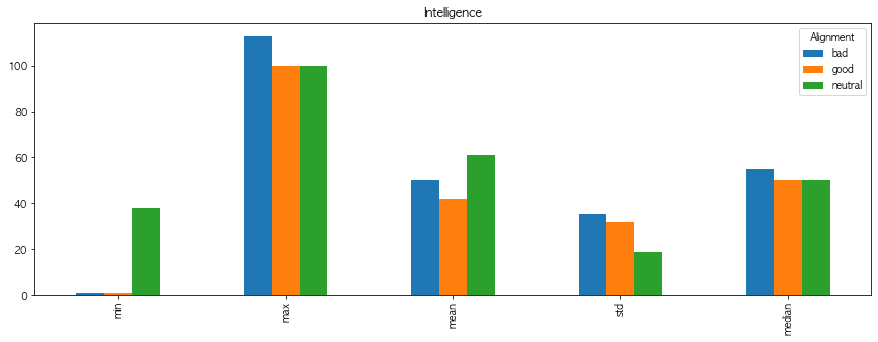

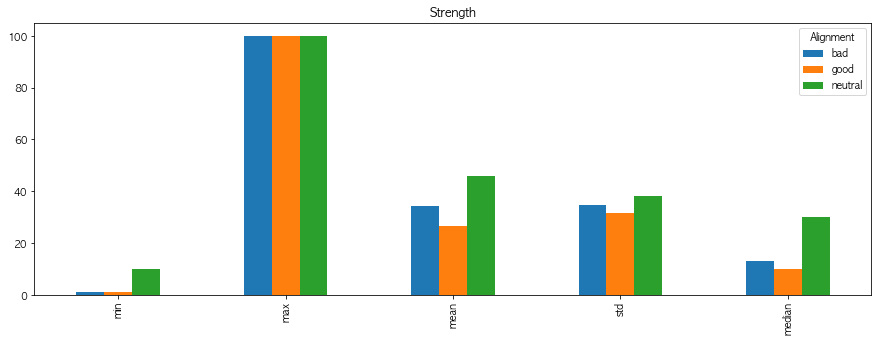

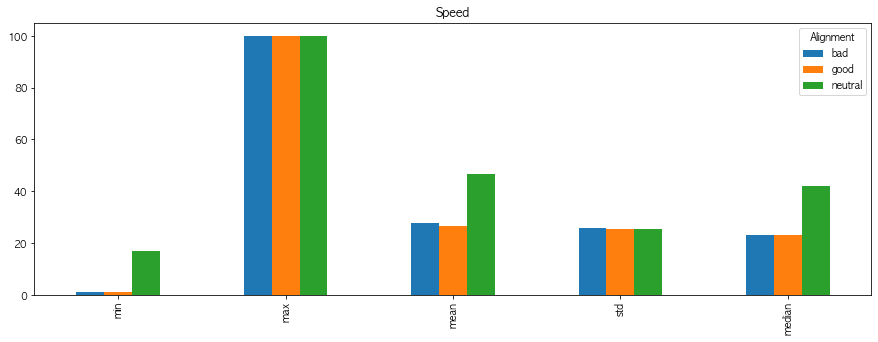

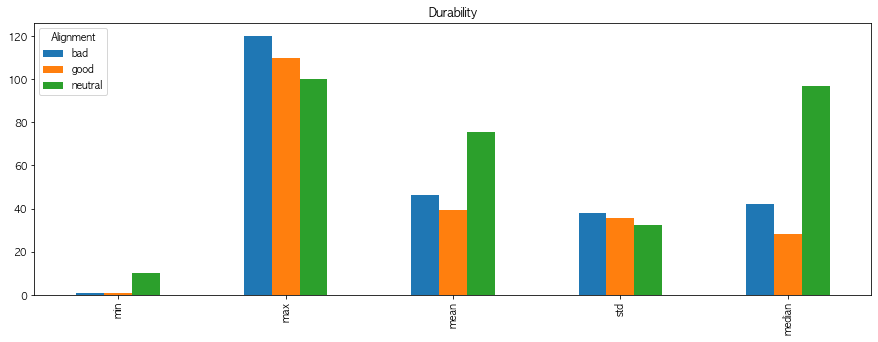

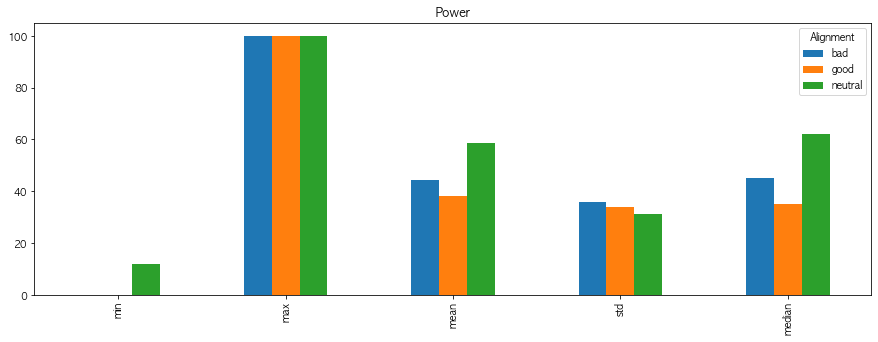

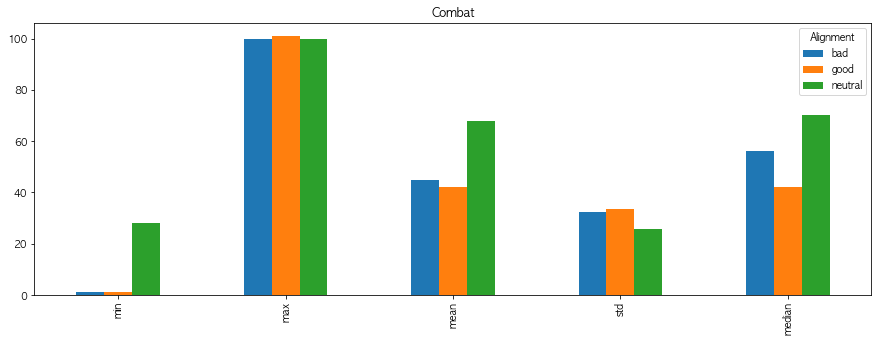

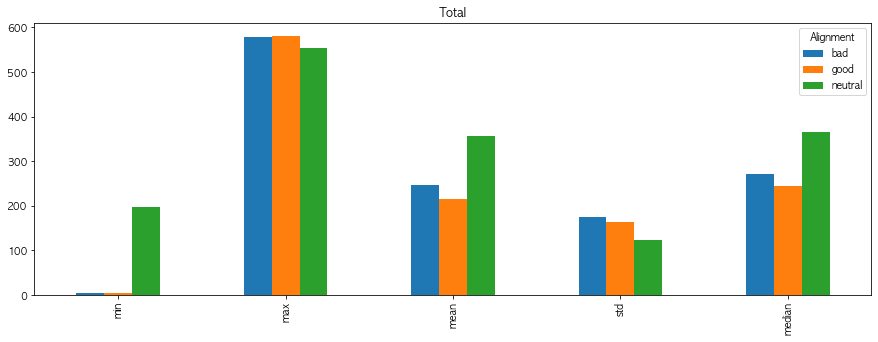

In [23]:
for feature in data:
    if feature not in ['Name','Alignment']:
        bar_graph(feature)